In [1]:
import matplotlib.pyplot as plt
import numpy as np
import csv
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm

In [2]:
driver_df1 = pd.read_csv("Data/city_data.csv")
driver_df2 = pd.read_csv("Data/ride_data.csv")

combined_ride_data = pd.merge(driver_df1, driver_df2, on="city")

combined_ride_data.head(25)

,city,driver_count,type,date,fare,ride_id
0,Tammyburgh,11,Urban,2017-01-02 10:56:28,12.40,7963408790849
1,Tammyburgh,11,Urban,2017-01-02 04:28:03,18.78,2315208159060
2,Tammyburgh,11,Urban,2017-01-03 03:00:08,30.10,558639764959
3,Tammyburgh,11,Urban,2017-01-01 00:10:21,7.76,9113511454178
4,Tammyburgh,11,Urban,2017-01-02 05:22:44,22.00,4171010688543
5,Tammyburgh,11,Urban,2017-01-02 21:29:38,5.37,5531485446571
6,Tammyburgh,11,Urban,2017-01-02 23:58:17,11.68,1012442651497
7,Tammyburgh,11,Urban,2017-01-02 21:10:16,31.16,7261786411548
8,Tammyburgh,11,Urban,2017-01-02 00:43:50,10.64,9221421228793
9,Tammyburgh,11,Urban,2017-01-01 12:39:10,9.88,6250336876297


In [3]:
#All this code is probably terrible but it basically makes a nice new dataframe with all the info needed for the bubbleplot

grouped_data = combined_ride_data.groupby(['city'])['fare'].mean()

grouped_df = pd.DataFrame(grouped_data)
grouped_df = grouped_df.rename(columns={"city":"City", "fare":"Average Fare Price"})
grouped_df['Average Fare Price'] = grouped_df['Average Fare Price'].round(2)

grouped_df2 = grouped_df.reset_index()
grouped_df2 = grouped_df2.rename(columns={"city":"City"})

ride_df = pd.DataFrame(combined_ride_data['city'].value_counts())
ride_df2 = ride_df.reset_index()
ride_df2 = ride_df2.rename(columns={"index":"City", "city":"Total Rides"})

new_grouped_df = pd.merge(grouped_df2, ride_df2, on="City")

grouped_drivers = combined_ride_data.groupby(['city'])['driver_count'].mean()
drivers_df = pd.DataFrame(grouped_drivers)
drivers_df2 = drivers_df.reset_index()
drivers_df2 = drivers_df2.rename(columns={"city":"City", "driver_count":"Total Drivers"})

grouped_rides = pd.merge(new_grouped_df, drivers_df2, on="City")

city_type = combined_ride_data.groupby(['city'])['type'].first()
city_df = pd.DataFrame(city_type)
city_df2 = city_df.reset_index()
city_df2 = city_df2.rename(columns={"city":"City", "type":"City Type"})

finished_df = pd.merge(grouped_rides, city_df2, on="City")

finished_df

#grouped_rides

,City,Average Fare Price,Total Rides,Total Drivers,City Type
0,Adamschester,29.59,9,27,Suburban
1,Alexisfort,27.37,33,24,Urban
2,Amberberg,28.62,16,13,Suburban
3,Anthonyfurt,29.49,17,17,Suburban
4,Boyleberg,32.40,5,13,Suburban
5,Brianfurt,24.51,22,4,Urban
6,Campbellmouth,34.18,8,2,Rural
7,Catherinebury,27.31,29,7,Urban
8,Curtismouth,25.05,31,40,Urban
9,Davidbury,30.83,20,13,Suburban


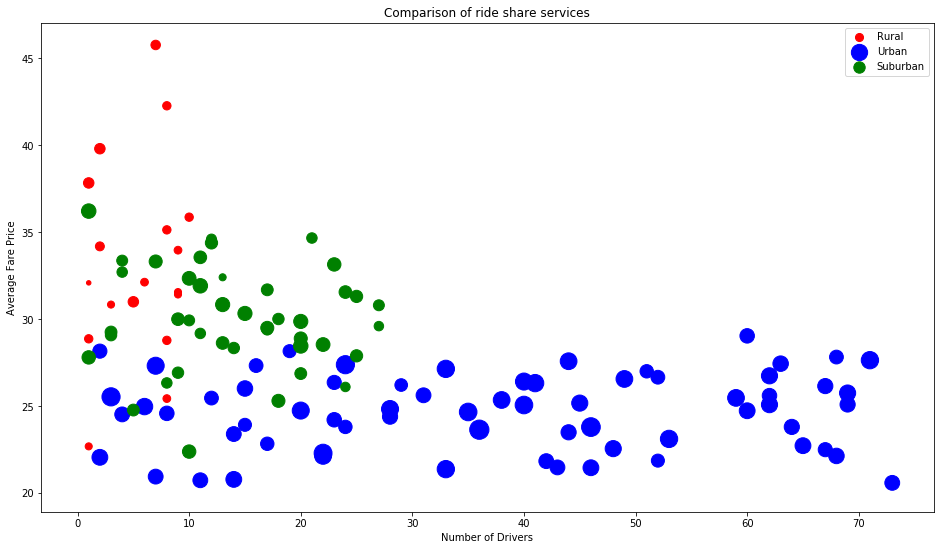

In [15]:
rural_df = finished_df[finished_df['City Type'] == 'Rural']
suburban_df = finished_df[finished_df['City Type'] == 'Suburban']
urban_df = finished_df[finished_df['City Type'] == 'Urban']

#n = len(finished_df['City Type'])
#city_names = finished_df['City']

ride_number_r = rural_df['Total Rides']
driver_number_r = rural_df['Total Drivers']
fare_r = rural_df['Average Fare Price']     

ride_number_u = urban_df['Total Rides']
driver_number_u = urban_df['Total Drivers']
fare_u = urban_df['Average Fare Price'] 

ride_number_s = suburban_df['Total Rides']
driver_number_s = suburban_df['Total Drivers']
fare_s = suburban_df['Average Fare Price'] 

#colors=cm.rainbow(np.random.rand(n))

plt.scatter(driver_number_r, fare_r, s=ride_number_r*10, color='red')
plt.scatter(driver_number_u, fare_u, s=ride_number_u*10, color='blue')
plt.scatter(driver_number_s, fare_s, s=ride_number_s*10, color='green')
#for i in range(n):
    #plt.annotate(city_names[i],xy=(driver_number[i],fare[i]))

plt.xlabel('Number of Drivers')
plt.ylabel('Average Fare Price')
plt.title('Comparison of ride share services')
plt.rcParams["figure.figsize"] = [16,9]

leg = plt.legend(['Rural', 'Urban', 'Suburban'])

plt.show()

ValueError: Invalid RGBA argument: 'light sky blue'

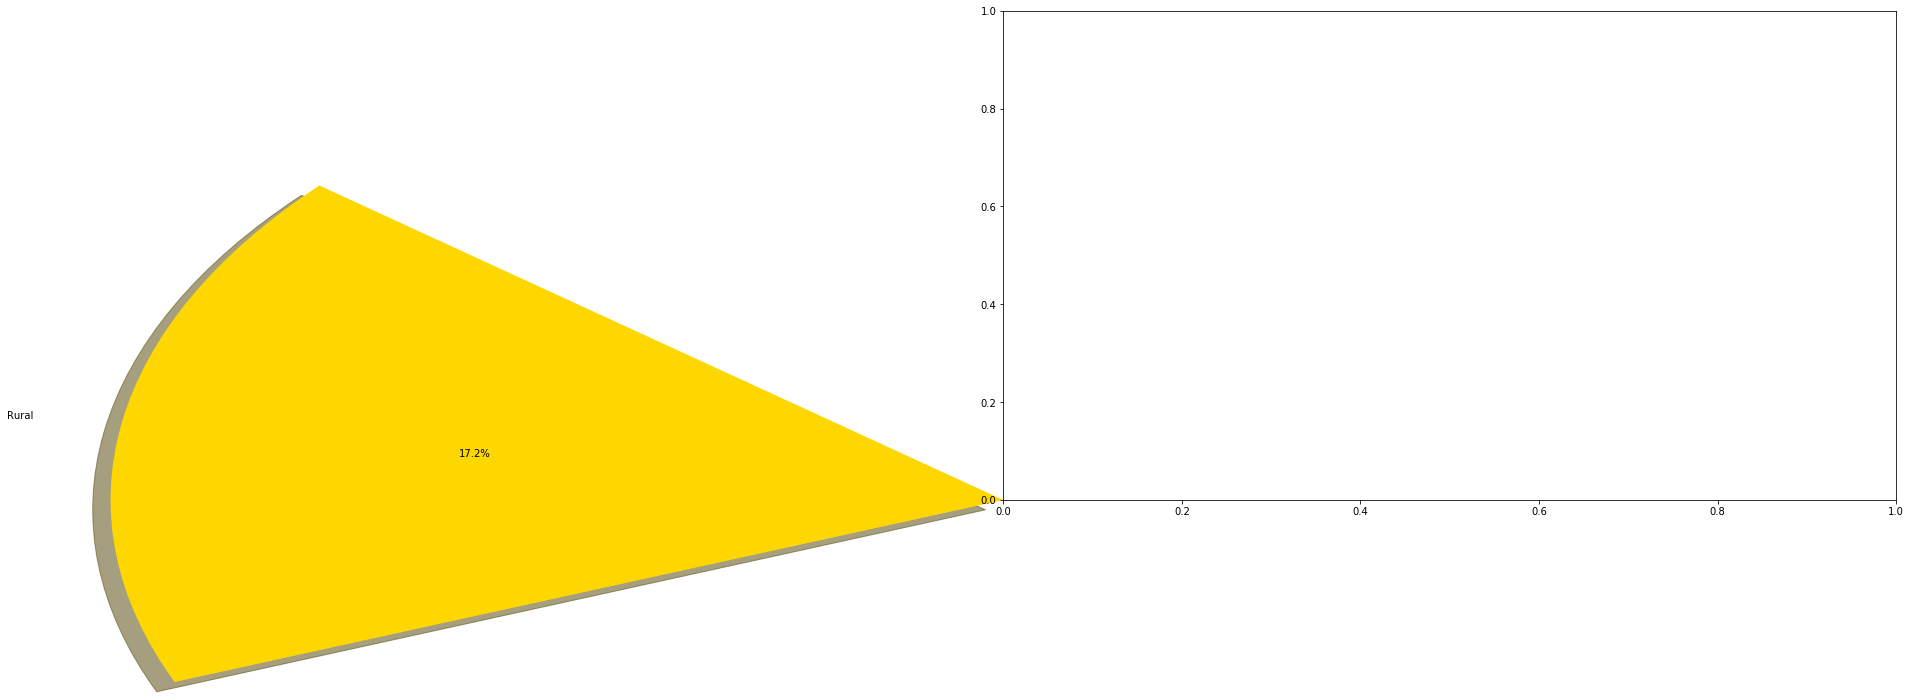

In [28]:
rural_total = rural_df['Average Fare Price'].sum()
urban_total = urban_df['Average Fare Price'].sum()
suburban_total = suburban_df['Average Fare Price'].sum()

fare_pie = ["Rural", "Urban", "Suburban"]
fare_pie_totals = [rural_total, urban_total, suburban_total]
pie1_colors = ["gold", "light sky blue", "light coral"]
explode1 = (0, 0, 0)

plt.pie(fare_pie_totals, explode=explode1, labels=fare_pie, colors=pie1_colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title('Percent of Fares by City Type')
plt.axis("equal")

(-1.117538840947629,
 1.1147685128034746,
 -1.1165950365383992,
 1.1063366004191526)

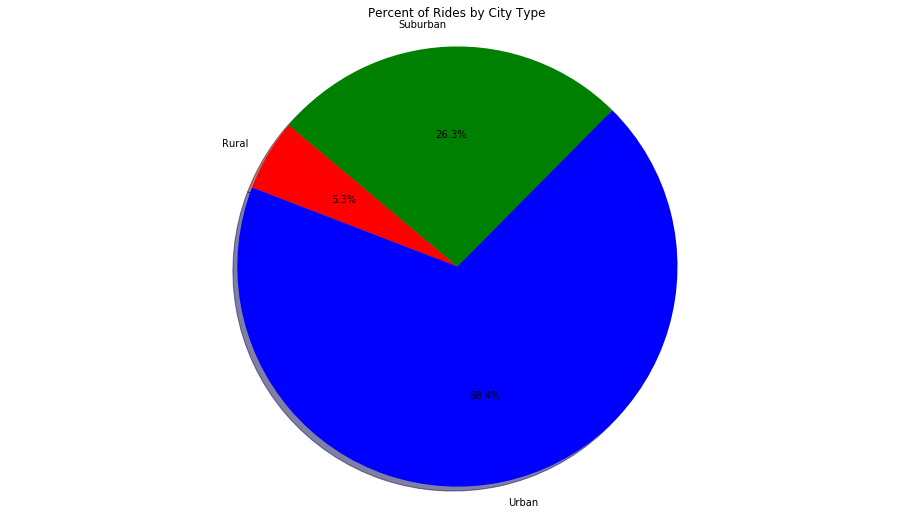

In [26]:
rural_total2 = rural_df['Total Rides'].sum()
urban_total2 = urban_df['Total Rides'].sum()
suburban_total2 = suburban_df['Total Rides'].sum()

fare_pie = ["Rural", "Urban", "Suburban"]
fare_pie_totals = [rural_total2, urban_total2, suburban_total2]
pie1_colors = ["red", "blue", "green"]
explode1 = (0, 0, 0)

plt.pie(fare_pie_totals, explode=explode1, labels=fare_pie, colors=pie1_colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title('Percent of Rides by City Type')
plt.axis("equal")

(-1.1056065671492485,
 1.1033826265715252,
 -1.1058207058352028,
 1.1167570879104152)

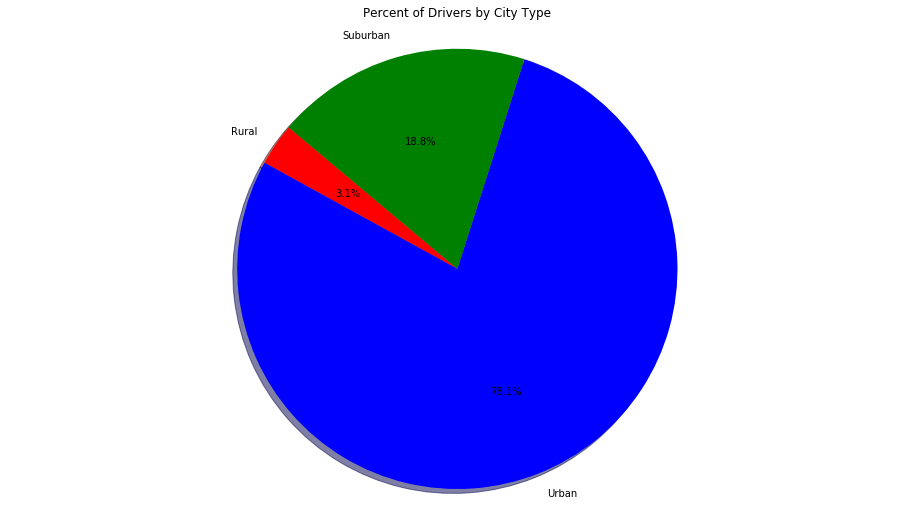

In [27]:
rural_total3 = rural_df['Total Drivers'].sum()
urban_total3 = urban_df['Total Drivers'].sum()
suburban_total3 = suburban_df['Total Drivers'].sum()

fare_pie = ["Rural", "Urban", "Suburban"]
fare_pie_totals = [rural_total3, urban_total3, suburban_total3]
pie1_colors = ["red", "blue", "green"]
explode1 = (0, 0, 0)

plt.pie(fare_pie_totals, explode=explode1, labels=fare_pie, colors=pie1_colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title('Percent of Drivers by City Type')
plt.axis("equal")